In [1]:
# Data
import numpy as np
import pandas as pd
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
# FFT
from scipy.fft import fft
# Loop's subdivision
import pyvista as pv
import vtk
from pyvistaqt import BackgroundPlotter


In [58]:
# Read surface point csv file

df = pd.read_csv("../surfacepointinput.csv", header = None)
df = df.iloc[:, :-1]
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1565,1566,1567,1568,1569,1570,1571,1572,1573,1574
0,-9.500000,-10.392305,0.000000,-8.500000,-10.392305,0.000000,-7.500000,-10.392305,0.000000,-6.500000,...,0.000000,8.500000,10.392305,0.000000,9.500000,10.392305,0.000000,10.500000,10.392305,0.000000
1,-9.500000,-10.392305,0.000000,-8.500000,-10.392305,0.000000,-7.500000,-10.392305,0.000000,-6.500000,...,0.000000,8.500000,10.392305,0.000000,9.500000,10.392305,0.000000,10.500000,10.392305,0.000000
2,-9.499682,-10.392048,-0.026058,-8.500010,-10.392186,0.005905,-7.500363,-10.392400,-0.009731,-6.499903,...,0.003665,8.499868,10.391777,-0.022029,9.499965,10.392469,-0.018084,10.499938,10.391964,0.004213
3,-9.499810,-10.391905,0.004373,-8.500046,-10.391790,-0.012042,-7.500067,-10.392235,0.019812,-6.499683,...,0.013078,8.499806,10.391823,-0.025988,9.500572,10.392552,-0.028492,10.499902,10.391570,-0.020487
4,-9.499658,-10.392016,-0.004708,-8.500171,-10.391497,-0.021207,-7.500479,-10.392062,0.013820,-6.499758,...,-0.017087,8.500049,10.391723,-0.038606,9.500342,10.392386,-0.041709,10.499644,10.391617,-0.026176


In [3]:
# Get only z-coord assuming the membrane has small derivation from
# x, y plane

df_z = df.iloc[:,2::3]
df_z.columns = range(df_z.columns.size)
df_z.head()

,0,1,2,3,4,5,6,7,8,9,...,515,516,517,518,519,520,521,522,523,524
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-0.026058,0.005905,-0.009731,-0.036624,-0.014046,-0.028042,-0.004826,-0.035594,0.017682,-0.029720,...,0.006067,0.026029,-0.037406,0.014154,0.017361,-0.047355,0.003665,-0.022029,-0.018084,0.004213
3,0.004373,-0.012042,0.019812,-0.033406,-0.005392,-0.031802,0.021508,-0.041335,0.010136,0.022110,...,0.025207,0.029431,-0.067740,-0.036892,0.030695,-0.072738,0.013078,-0.025988,-0.028492,-0.020487
4,-0.004708,-0.021207,0.013820,-0.037472,-0.008306,-0.023977,0.013175,-0.034845,-0.000135,-0.011283,...,0.009488,0.009007,-0.026997,-0.025357,0.002146,-0.079825,-0.017087,-0.038606,-0.041709,-0.026176


In [5]:
# Parameters

timeStep = 0.1 #us
diffConst = 0.001 #um^2/us

sideX = 20.0
sideY = 20.0
lFace = 1.0

indexSample = 245 # index of vertex for sample plotting
indexSampleList = [239, 240, 241] # index list of vertices for sample plotting

numStep = len(df_z) - 1 # total number of steps (time intervals) = # time points - 1

samplingRate = 100000/timeStep
membraneBendingConst = 4.17


nFaceX = round(sideX / lFace) # number of edges along x-axis
dFaceX = sideX / nFaceX # calculate actual face side length x-axis
dFaceY = 0.8660254 * dFaceX # sqrt(3.0)/2.0; calculate perpendicular face side length along y-axis
nFaceY = round(sideY / dFaceY) # number of edges along y-axis

if nFaceY % 2 == 1:
    # returns 1 if odd, else 0,
    # @ref https://stackoverflow.com/questions/62030964/
    nFaceY += 1 # make nFaceY even for fixed shape in Y axis

nVertX = nFaceX + 1
nVertY = nFaceY + 1

print("nVertX = " + str(nVertX))
print("nVertY = " + str(nVertY))

nVertX = 21
nVertY = 25


h(x,y)~t
=

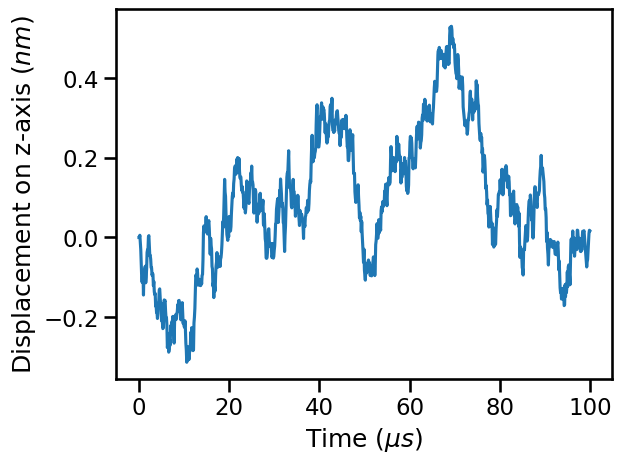

In [6]:
#plot h(x,y)~t
#pick (x,y,z)*
index = indexSample

timeScale = np.linspace(0, numStep*timeStep, numStep+1)

plt.plot(timeScale, df.iloc[:,index])
plt.xlabel("Time ($\mu s$)")
plt.ylabel("Displacement on z-axis ($nm$)")
plt.show()

The periodic BC only allows for drifting of the membrane but not rotating. This means that the displacement can be largely correlated to membrane drifting over long period of simulation. To eliminate the effect of overall drifitng, side length is used for FFT.

FFT~h(t)
=

In [10]:
def getPoint(df, index):
    """
    This function takes a pandas DataFrame `df` and an integer `index`
    and returns a subset DataFrame `df_pt` containing rows from 0 to `numStep` 
    (assuming `numStep` is defined in the global scope of the function) 
    and columns from index * 3 to index * 3 + 2, inclusive.
    
    Parameters:
    ----------
        df : pandas DataFrame
            Input data.
        index : int
            Index of the point to extract.
    
    Returns:
    -------
        df_pt : pandas DataFrame
            Subset of input DataFrame `df` containing only the rows and columns required 
            for a specific point, as defined by `index`.
    """
    df_pt = df.iloc[0:int(numStep)+1,index*3:index*3+3]
    df_pt.columns = range(df_pt.columns.size)
    return df_pt

# Set index1 and index2 using the first and second index in indexSampleList respectively
index1 = indexSampleList[0]
index2 = indexSampleList[1]

# Calculate time sequence based on the number of steps and time step, as well as vibration output 
# computed as the sum of squared differences between the two points specified by index1 and index2 for each step.
timeScale = np.linspace(0, timeStep * numStep, numStep + 1)
vibrationOutput = (np.power(getPoint(df, index1) - getPoint(df, index2),2)).sum(axis=1)-1

# Center vibrations by subtracting their mean, then compute FFT of the result
vibrationOutput -= vibrationOutput.mean()
fftResult = fft(np.array(vibrationOutput))

fftResult


array([-1.37390099e-15 -0.j        ,  7.84478849e-01-12.31060502j,
       -1.12900145e+00 -3.62109872j, ...,  2.14569361e+00 -1.14810812j,
       -1.12900145e+00 +3.62109872j,  7.84478849e-01+12.31060502j])

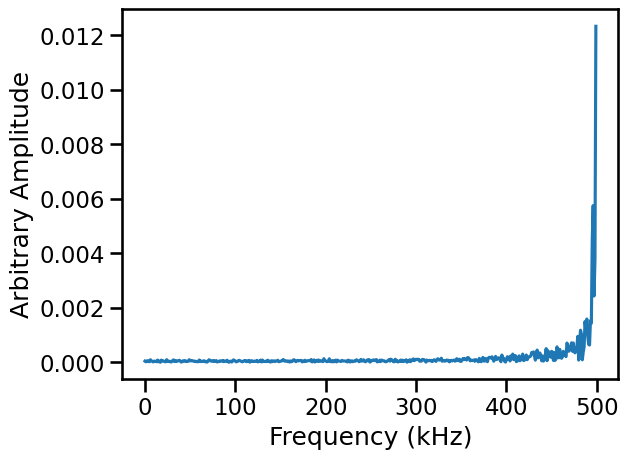

In [12]:
shiftedResult = np.abs(np.fft.fftshift(fftResult))[:numStep // 2] * 1 / numStep #second half is only imaging of first half
#fft result
plt.plot((samplingRate / 1000.0 * np.linspace(0,numStep//2 - 1,numStep//2)/numStep), shiftedResult)
plt.xlabel("Frequency (kHz)")
plt.ylabel("Arbitrary Amplitude")
plt.show()

Resolving Translation - Get h*(x, y, t)
====
Use the difference in z between a given point and the average of mesh points to get rid of the effect of translation of the whole membrane


In [19]:
z_mean = df_z.mean(axis=1)
z_mean.head()

0    0.000000
1   -0.000359
2   -0.000861
3   -0.001301
4   -0.002558
dtype: float64

FFT2
===
Plot the relation ship between h(q) and |q|

 $$L = \text{side length of membrane}$$
 $$(x,y) = \text{position of surface points}$$
 
 $$\vec{q}={L}\begin{pmatrix}{n_{x}}\\{n_{y}}\\\end{pmatrix}$$
 
 Therefore,
 
 $$\vec{q}^2=\frac{1}{L^2}({n_{x}^2}+{n_{y}^2})$$

In [20]:

x_scale = nVertX # number of vertices in x direction
y_scale = nVertY # number of vertices in y direction
time = int (numStep / 2) # folded time in FFT space (second half is mirror of first half)
L_mean = (x_scale + y_scale) / 2 # mean side length

In [21]:
def extract_xy_at_t(df, time, x_scale, y_scale, zmean=0.0):
    """
    Extracts the z-coordinate given x-y position information from a pandas DataFrame at a specified time.

    Parameters
    ----------
    df : pandas.DataFrame
        Dataframe containing all the x-y-z information.
    time : int
        Index for the time slice to be extracted.
    x_scale : int
        Number of columns in the x direction.
    y_scale : int
        Number of rows in the y direction.
    zmean : float, optional
        Mean value of the z-direction, by default 0.0.

    Returns
    -------
    np.array
        A 2D numpy array of z-coordinate based on x-y index information at the specified time.

    Examples
    --------
    >>> arr_xy = extract_xy_at_t(df, 100, 512, 512, zmean=10.0)
    """
    # Create an array of zeros with dimensions y_scale x x_scale to store the extracted x,y values at specified time 
    arr_xy = np.zeros([y_scale, x_scale])
    
    # Extract the x,y values from input dataframe for the specified time and scale them by 3 before adding offset zmean
    for y in range(0, y_scale):
        for x in range(0, x_scale):
            arr_xy[y][x] = df.iloc[time,(x + y * x_scale)*3+2] - zmean
    
    # Return the extracted x,y values as a numpy array
    return arr_xy

def extract_q2(nrow, ncol, L_mean = 20.0): #l in um
    """
    Extracts the q^2 values given the number of rows and columns.

    Parameters
    ----------
    nrow : int
        Number of rows.
    ncol : int
        Number of columns.

    Returns
    -------
    np.array
        A numpy array containing the calculated q^2 values.

    Examples
    --------
    >>> arr_q2 = extract_q2(512, 512)
    """
    arr_q2 = np.zeros([nrow,ncol])
    for row in range(0, nrow):
        for col in range(0, ncol):
            arr_q2[row][col] = ((1/L_mean * row) ** 2 + (1/L_mean * col) ** 2)# 4pi^2
    return arr_q2

In [22]:
arr_xy = extract_xy_at_t(df, time, x_scale, y_scale) # extract z values from dataframe df at x_scale and y_scale for given time instance
#arr_xy
arr_fft2 = np.abs(np.fft.fft2(arr_xy)) # Return 2D discrete Fourier Transform of arr_xy with absolute value 
arr_fft2_trimmed = arr_fft2[0:len(arr_fft2)//2][0:len(arr_fft2[0])//2]# trim the zero frequencies and mirror image

arr_sqr_fft2 = (np.power(arr_fft2_trimmed, 2)).ravel() # take square of each element in arr_fft2_trimmed and flatten it
arr_sqr_fft2

array([1.35518496e+02, 6.33797262e+00, 1.03688553e+00, 2.21879566e+01,
       1.42020787e+01, 6.91579896e+00, 9.86765475e-01, 3.46777460e+00,
       3.67802777e+01, 2.62416374e+01, 1.33049655e+01, 1.33049655e+01,
       2.62416374e+01, 3.67802777e+01, 3.46777460e+00, 9.86765475e-01,
       6.91579896e+00, 1.42020787e+01, 2.21879566e+01, 1.03688553e+00,
       6.33797262e+00, 6.42557069e+01, 2.92940767e+01, 1.34964466e+01,
       1.63321349e+01, 2.83591143e+01, 1.87566894e+01, 1.72392116e+00,
       2.41703896e+00, 3.08106416e+00, 6.87725799e+00, 3.93405607e+00,
       1.03742972e+01, 5.58626681e+00, 9.53286119e+00, 2.26445353e+01,
       1.67558517e+01, 1.01218322e+01, 5.63922527e-01, 2.02870805e+01,
       1.65455882e+01, 3.14057272e+01, 1.76625795e+00, 9.43721484e+00,
       1.44427697e+01, 1.52338819e+00, 7.60573564e+00, 2.15173247e+00,
       7.11850957e-01, 2.30996240e+00, 8.62607019e+00, 1.56089915e+01,
       1.72919912e+00, 1.31913500e+00, 5.45456251e-01, 7.34914292e-01,
      

In [30]:
qspace_len = len(arr_sqr_fft2) # get number of points in |q|
arr_sqr_fft2_sum = np.zeros(qspace_len)
for time in range(0, numStep): # average h(q)h*(q) over given time scale: <h(q)h*(q)>
    arr_xy = extract_xy_at_t(df, time, x_scale, y_scale, zmean = z_mean[time]) # resolve translation
    arr_fft2 = np.abs(np.fft.fft2(arr_xy))
    arr_fft2_trimmed = arr_fft2[0:len(arr_fft2)//2][0:len(arr_fft2[0])//2]
    arr_sqr_fft2 = (np.power(arr_fft2_trimmed, 2)).ravel() # For complex number h(q): h(q)h*(q) = |h(q)|^2
    arr_sqr_fft2_sum += arr_sqr_fft2
    if (time % 200 == 0):
        print("Complete:" + str(time))
arr_sqr_fft2_average = arr_sqr_fft2_sum/numStep

Complete:0
Complete:200
Complete:400
Complete:600
Complete:800


Text(0.5, 0, '$|q| (nm^{-1})$')

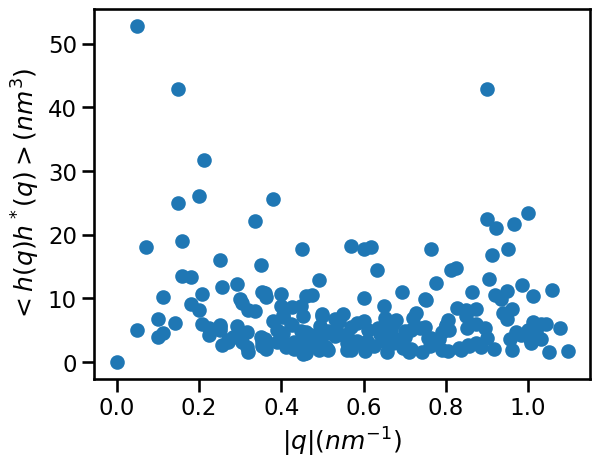

In [33]:
#flatten q2 for plotting
q2 = extract_q2(len(arr_fft2_trimmed),len(arr_fft2_trimmed[0]))
arr_q2_flatten = q2.ravel()

plt.scatter(np.power(arr_q2_flatten, 0.5), arr_sqr_fft2_average) # take sqrt of q^2 to get |q|
plt.ylabel('$<h(q)h^*(q)> (nm^3)$')
plt.xlabel('$|q| (nm^{-1})$')


Loop's Subdivision
====

In [55]:
# Read surface point csv file

df_mesh = pd.read_csv("../meshpointinput.csv", header = None)
df_mesh = df.iloc[:, :]
df_mesh.head()

,0,1,2,3,4,5,6,7,8,9,...,1565,1566,1567,1568,1569,1570,1571,1572,1573,1574
0,-9.500000,-10.392305,0.000000,-8.500000,-10.392305,0.000000,-7.500000,-10.392305,0.000000,-6.500000,...,0.000000,8.500000,10.392305,0.000000,9.500000,10.392305,0.000000,10.500000,10.392305,0.000000
1,-9.499682,-10.392048,-0.026058,-8.500010,-10.392186,0.005905,-7.500363,-10.392400,-0.009731,-6.499903,...,0.003665,8.499868,10.391777,-0.022029,9.499965,10.392469,-0.018084,10.499938,10.391964,0.004213
2,-9.499810,-10.391905,0.004373,-8.500046,-10.391790,-0.012042,-7.500067,-10.392235,0.019812,-6.499683,...,0.013078,8.499806,10.391823,-0.025988,9.500572,10.392552,-0.028492,10.499902,10.391570,-0.020487
3,-9.499658,-10.392016,-0.004708,-8.500171,-10.391497,-0.021207,-7.500479,-10.392062,0.013820,-6.499758,...,-0.017087,8.500049,10.391723,-0.038606,9.500342,10.392386,-0.041709,10.499644,10.391617,-0.026176
4,-9.499994,-10.392065,-0.055451,-8.499808,-10.391255,0.025904,-7.500152,-10.392103,0.042151,-6.499680,...,-0.023058,8.500292,10.391558,0.023338,9.499926,10.392393,-0.039842,10.499660,10.391575,-0.069393


In [59]:
arr_mesh_x = df_mesh.iloc[:, 0::3].to_numpy()

arr_mesh_y = df_mesh.iloc[:, 1::3].to_numpy()

arr_mesh_z = df_mesh.iloc[:, 2::3].to_numpy()



In [71]:
# Get cells (faces)

def ind(i, j, nVertX = nVertX):
    """
    Map 2D indices (i,j) to a linear index in a flattened 1D array.

    Parameters
    ----------
    i: int
        The column index
    j: int
        The row index
    nFaceX: int
        The number of edges along the x-axis

    Returns
    -------
    int:
        The linear index in the flattened 1D array.
    """
    return i + j * nVertX


cells = [] # triangular mesh cell
for i in range(0, nFaceX):
    for j in range(0, nFaceY):
        cells.append([3, ind(i, j), ind(i + 1, j), ind(i + 1, j + 1)])
        cells.append([3, ind(i, j), ind(i, j + 1), ind(i + 1, j + 1)])

In [93]:
i = 0

npdat = np.transpose(np.array([arr_mesh_x[i], arr_mesh_y[i], arr_mesh_z[i]]))
mesh = pv.PolyData(npdat, cells)
meshsub = mesh.subdivide(3, subfilter = 'loop')
meshsub.points

pyvista_ndarray([[ -9.417969 , -10.250223 ,   0.       ],
                 [ -8.5      , -10.392305 ,   0.       ],
                 [ -7.5      , -10.392305 ,   0.       ],
                 ...,
                 [  9.567383 ,  10.065854 ,   0.       ],
                 [  9.740234 ,  10.169033 ,   0.       ],
                 [  9.685059 ,  10.0616255,   0.       ]], dtype=float32)

In [94]:
# Define the number of bins and the range of y-values that will be used to classify the points
num_bins = 100
y_min = -10.0
y_max = 10.0

# Create an array of bin edges based on the number of bins and the range of y-values
bin_edges = np.linspace(y_min, y_max, num_bins + 1)

# Use the digitize function to map each point to its corresponding bin based on its y-value
point_y_values = meshsub.points[:, 1] # Assume y-values are stored in the 2nd column of the points ndarray
bin_indices = np.digitize(meshsub.points[:, 1], bin_edges) - 1 # Subtract 1 to get 0-based bin indices

# Group the points by their bin index
points_by_bin = []
for i in range(num_bins):
    if i % 2 == 0:
        points_by_bin.append(meshsub.points[bin_indices == i])

In [96]:
points_by_bin[0]

pyvista_ndarray([[-9.225586  , -9.950835  ,  0.        ],
                 [-8.730469  , -9.959292  ,  0.        ],
                 [-9.720703  , -9.942378  ,  0.        ],
                 [-8.230469  , -9.959292  ,  0.        ],
                 [-7.7304688 , -9.959292  ,  0.        ],
                 [-7.2304688 , -9.959292  ,  0.        ],
                 [-6.7304688 , -9.959292  ,  0.        ],
                 [-6.2304688 , -9.959292  ,  0.        ],
                 [-5.7304688 , -9.959292  ,  0.        ],
                 [-5.2304688 , -9.959292  ,  0.        ],
                 [-4.7304688 , -9.959292  ,  0.        ],
                 [-4.2304688 , -9.959292  ,  0.        ],
                 [-3.7304688 , -9.959292  ,  0.        ],
                 [-3.2304688 , -9.959292  ,  0.        ],
                 [-2.7304688 , -9.959292  ,  0.        ],
                 [-2.2304688 , -9.959292  ,  0.        ],
                 [-1.7304688 , -9.959292  ,  0.        ],
              

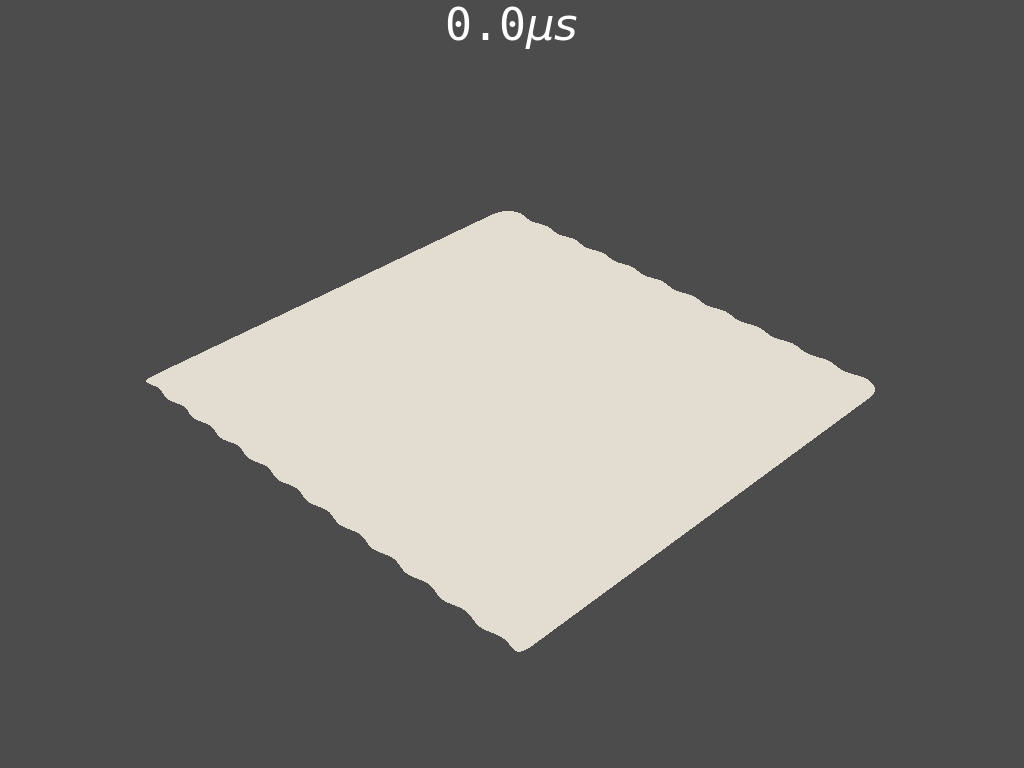

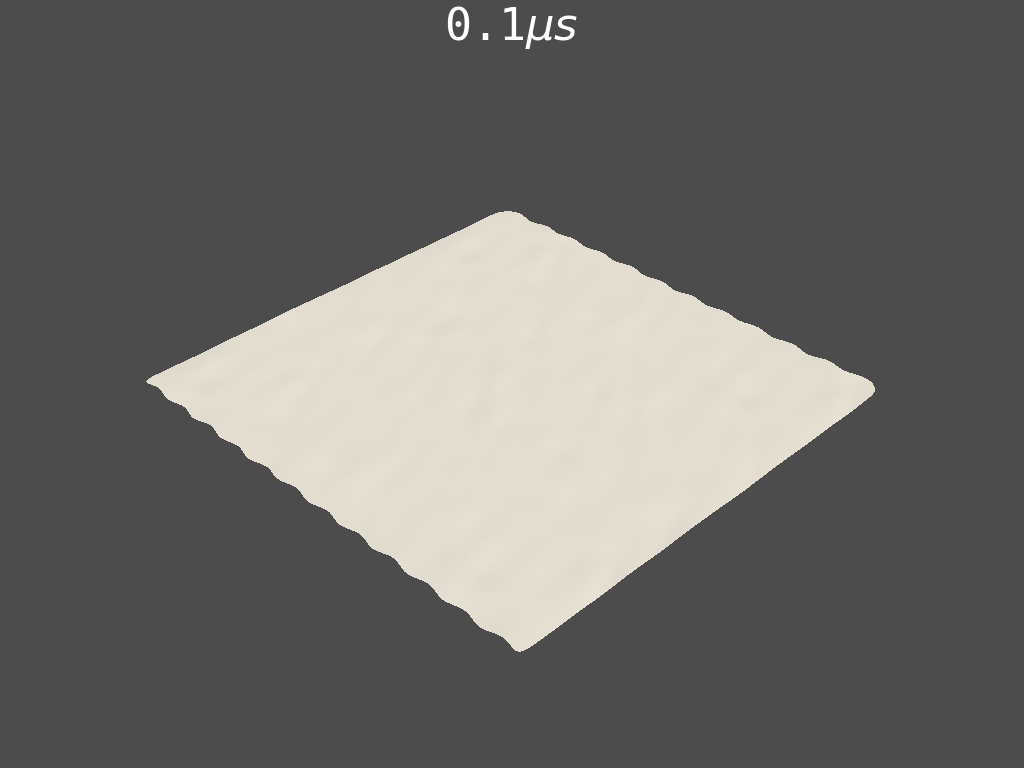

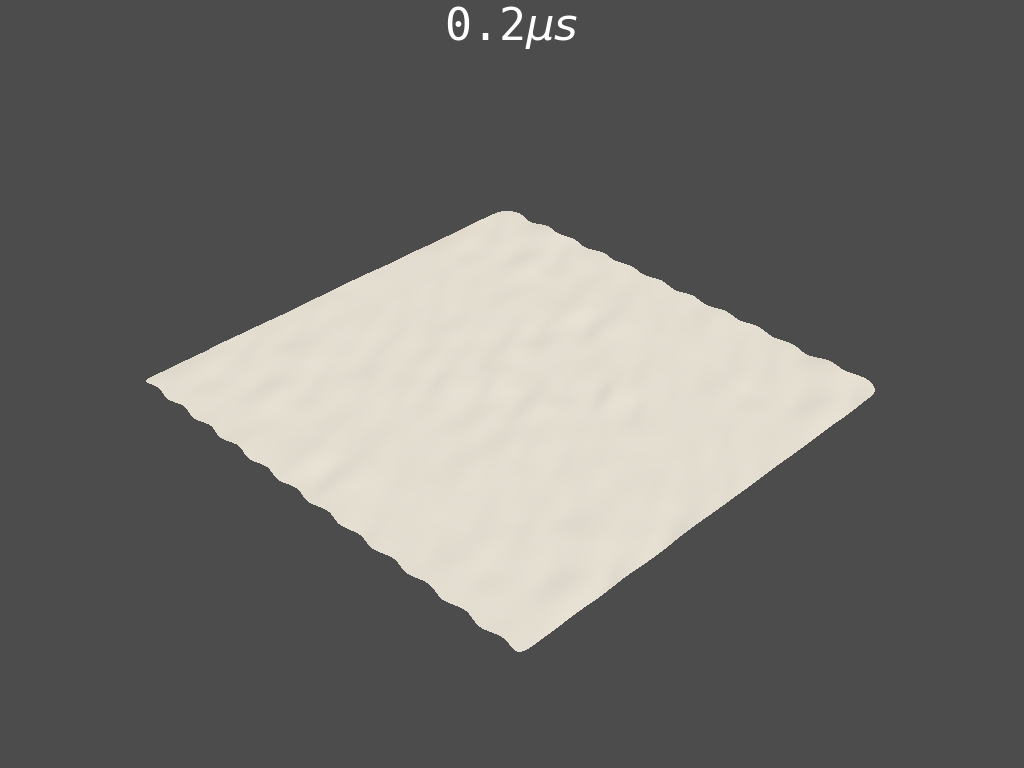

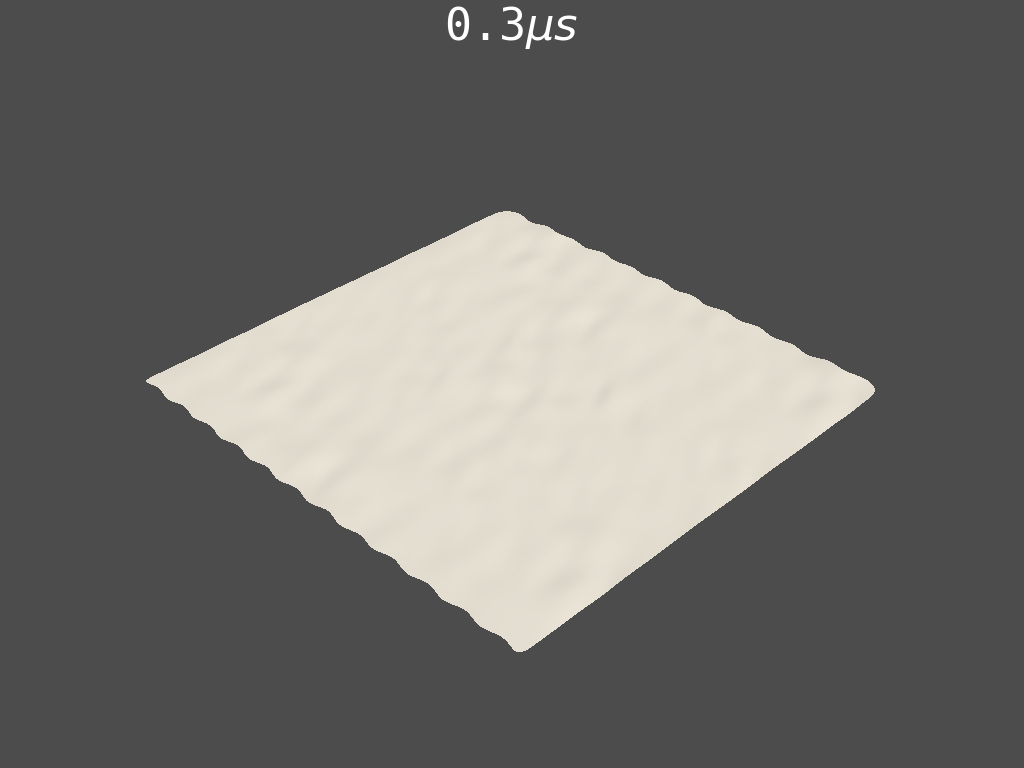

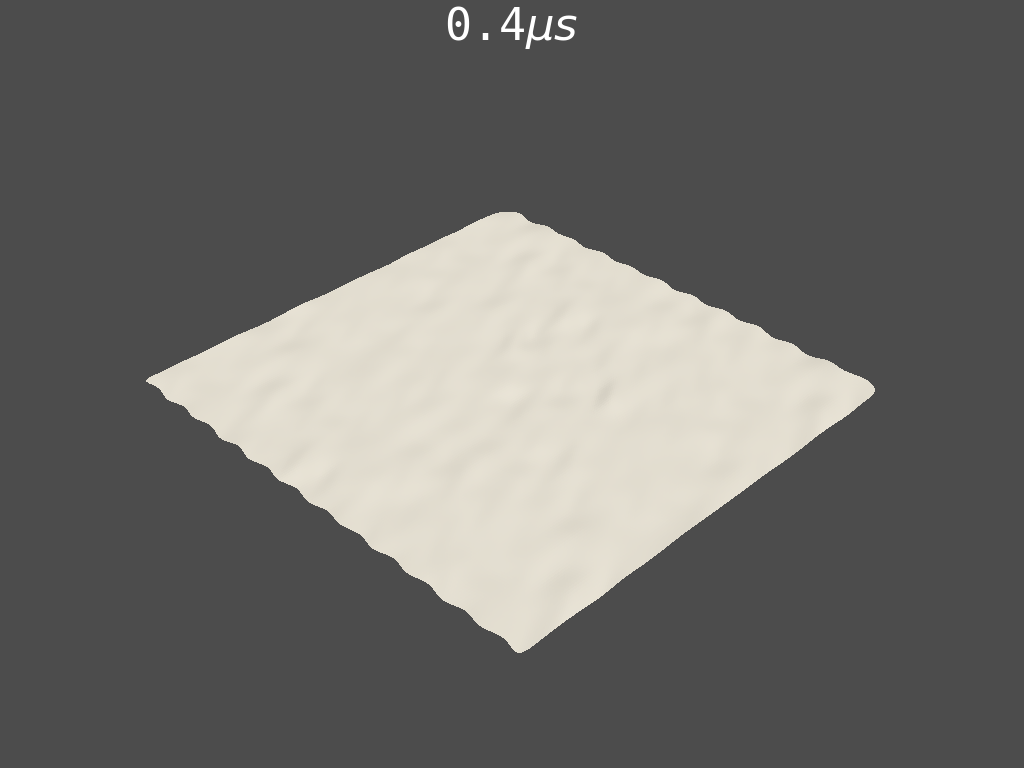

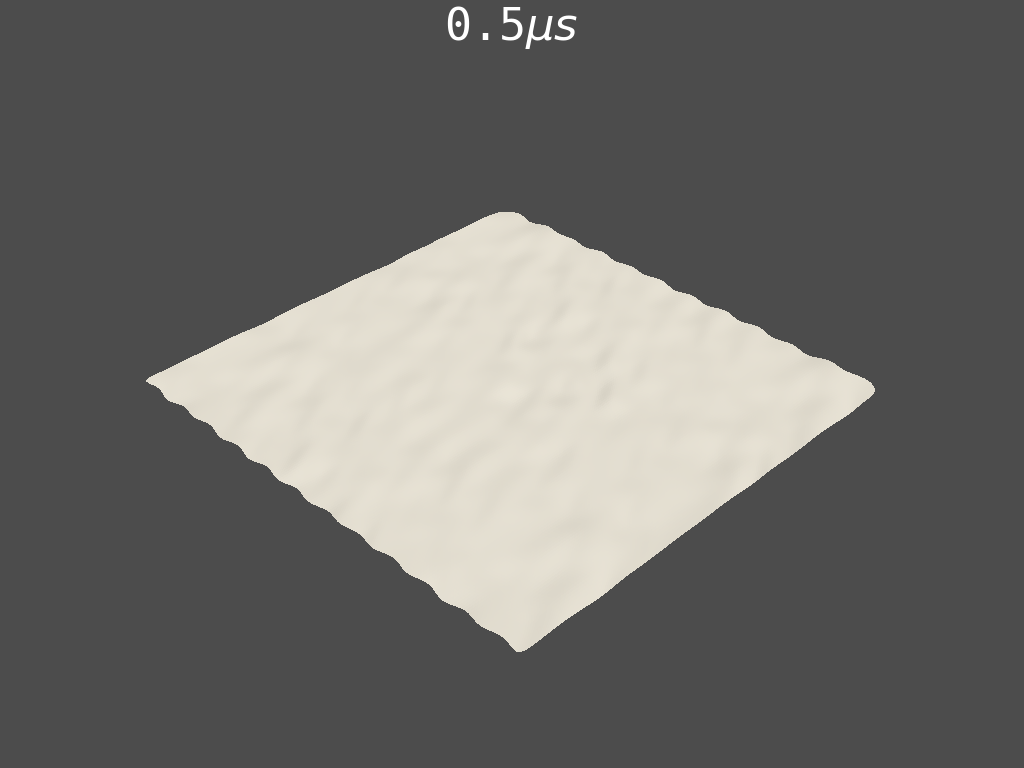

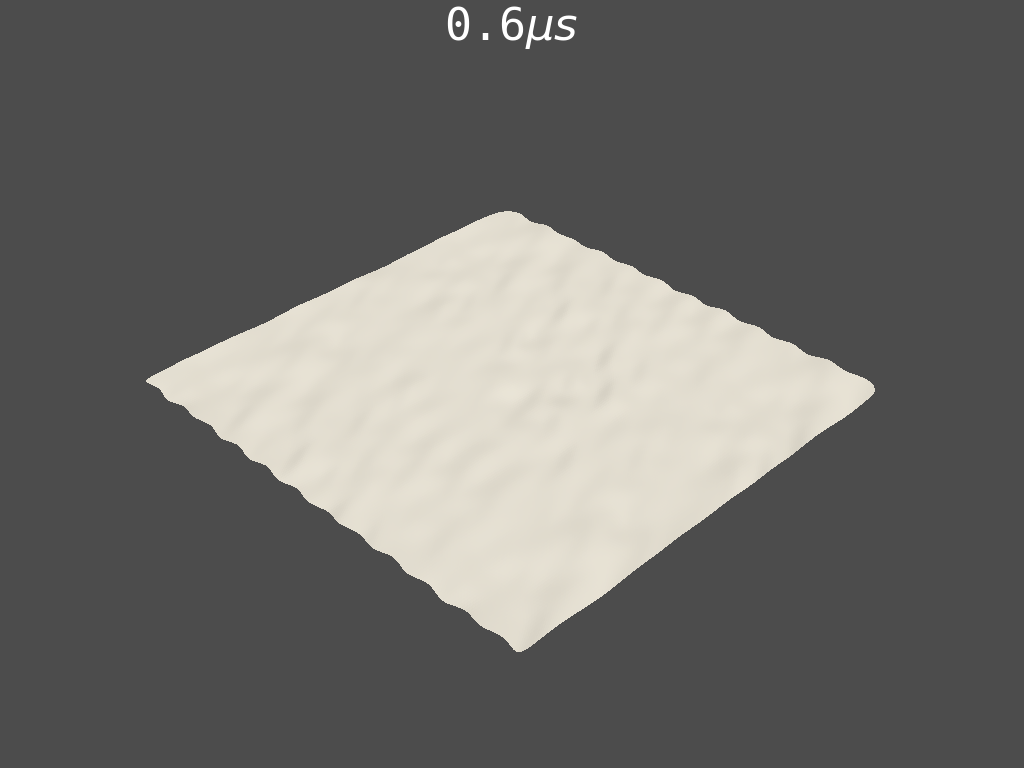

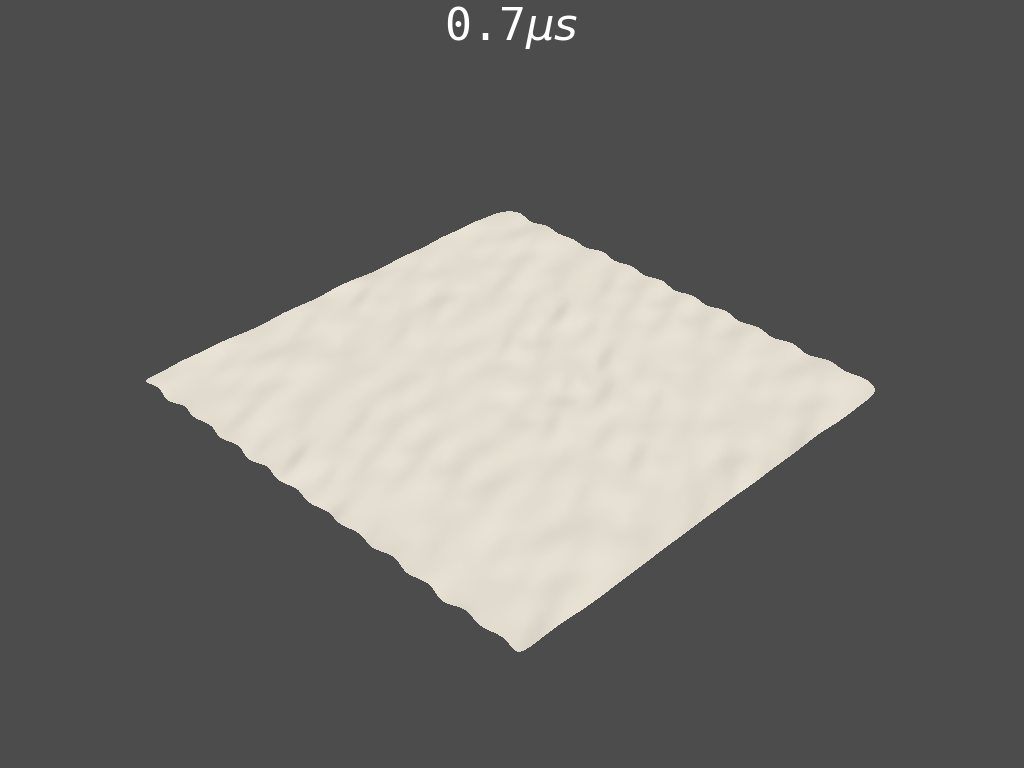

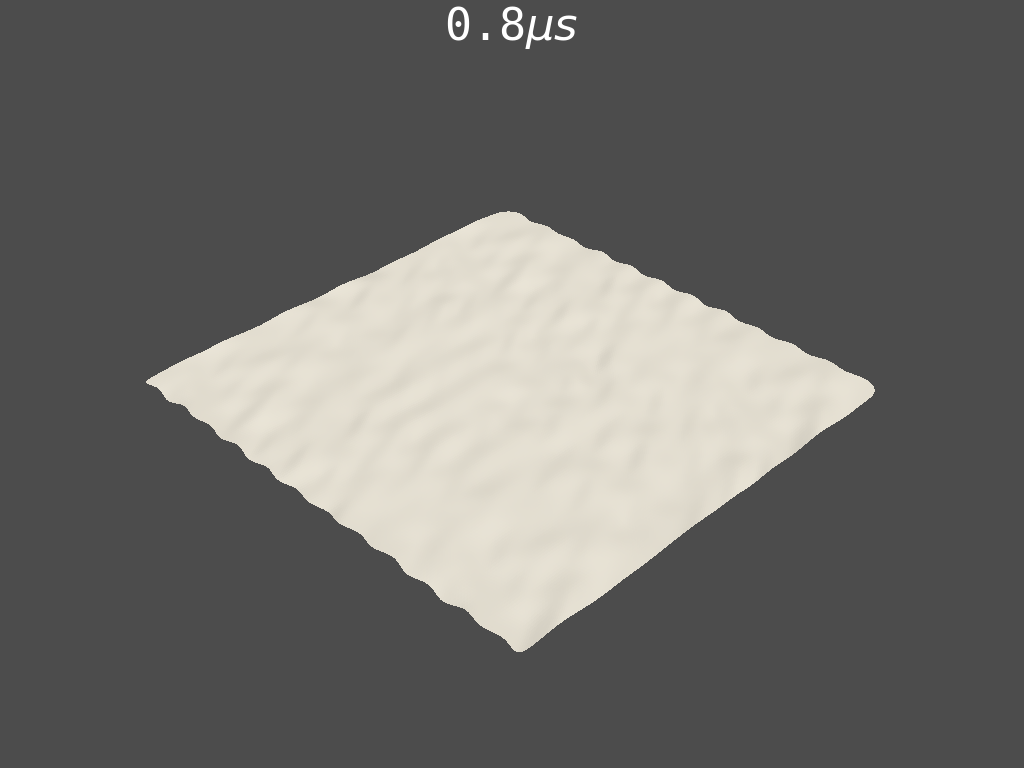

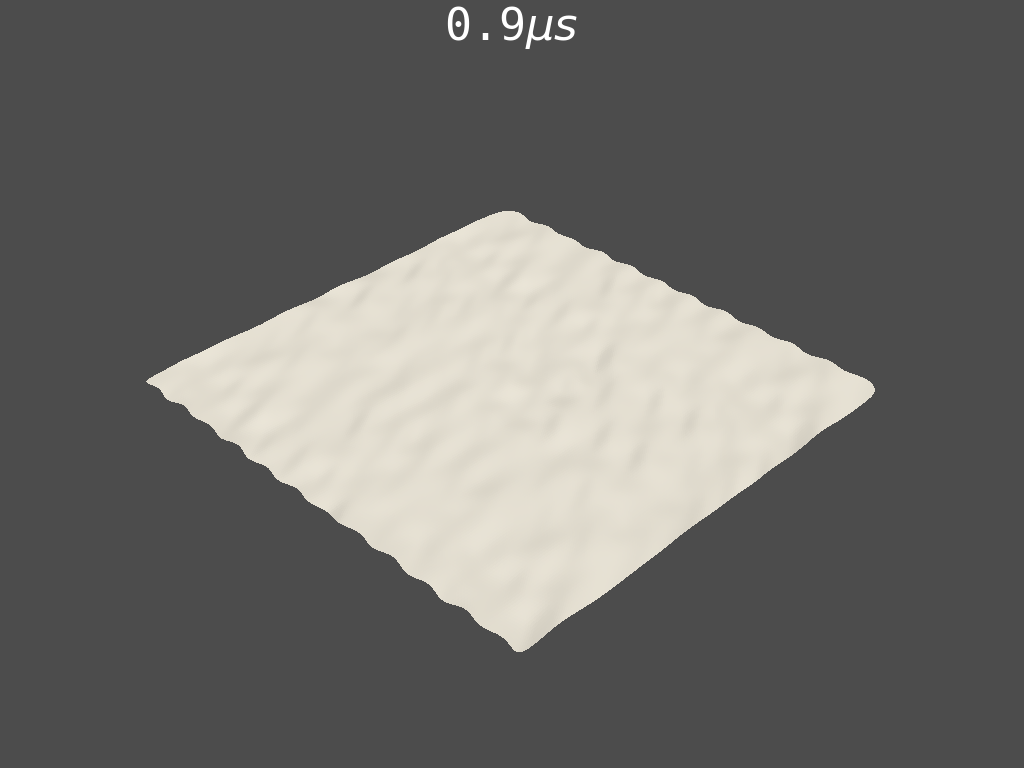

In [76]:
for i in range(0, 10):
    # Get mesh at i
    npdat = np.transpose(np.array([arr_mesh_x[i], arr_mesh_y[i], arr_mesh_z[i]]))
    mesh = pv.PolyData(npdat, cells)
    # Subdivision
    meshsub = mesh.subdivide(3, subfilter = 'loop')
    # Plot
    p = pv.Plotter()
    p.add_mesh(meshsub, show_edges = False, color = True)
    p.add_title("{0:.1f}".format(timeStep * i) + "$\mu s$", font = 'courier')
    #screenshot = './anim/' + str(i) + '_anim.png'
    p.show()

In [ ]:


# FF2 - Trim out the periodic region
# ===

# In[51]:


#h(q) over |q| (using FFT2)
x_scale = 41
y_scale = 47
time = 5000
L = (x_scale + y_scale * 0.86602540378)/2 -5

# extract x y info to np.array at time t
def extract_xy_at_t(df, time, x_scale, y_scale, zmean = 0.0):
    arr_xy = np.zeros([y_scale,x_scale])
    for y in range(0, y_scale):
        for x in range(0, x_scale):
            arr_xy[y][x] = df.iloc[time,(x + y * x_scale)*3+2] - zmean
    return arr_xy

# vector_q = (1/L * row, 1/L * col)
# q2 = (1/L * row) ** 2 + (1/L * col) ** 2
def extract_q2(nrow, ncol): #l in um
    arr_q2 = np.zeros([nrow,ncol])
    for row in range(0, nrow):
        for col in range(0, ncol):
            arr_q2[row][col] = ((1/L * row) ** 2 + (1/L * col) ** 2) * 39.4784176044
    return arr_q2


# In[52]:


arr_periodic_trimmed = []
for y in range(0,y_scale-4):
    for x in range(0,x_scale-4):
        for i in range(0,3):
            arr_periodic_trimmed.append((x+y*x_scale)*3+i)
arr_periodic_trimmed


# In[53]:


df_periodic_trimmed = df.iloc[:,arr_periodic_trimmed]
df_periodic_trimmed.columns = range(0,len(df_periodic_trimmed.columns))
df_periodic_trimmed


# In[54]:


qspace_len = 666 # get number of points in |q|
arr_sqr_fft2_sum = np.zeros(qspace_len)
numitr = 2000
for time in range(5000,5000+numitr): # average h(q)h*(q) over given time scale: <h(q)h*(q)>
    arr_xy = extract_xy_at_t(df_periodic_trimmed, time, x_scale-4, y_scale-4, zmean = z_mean[time]) # resolve translation
    arr_fft2 = np.abs(np.fft.fft2(arr_xy))
    arr_fft2_trimmed = arr_fft2[0:len(arr_fft2)//2][0:len(arr_fft2[0])//2]
    arr_sqr_fft2 = (np.power(arr_fft2_trimmed, 2)).ravel() # For complex number h(q): h(q)h*(q) = |h(q)|^2
    arr_sqr_fft2_sum += arr_sqr_fft2
    if (time % 200 == 0):
        print("Complete:" + str(time))
arr_sqr_fft2_average = arr_sqr_fft2_sum/numitr
arr_sqr_fft2_average


# In[55]:


#flatten q2 for plotting
q2 = extract_q2(len(arr_fft2_trimmed),len(arr_fft2_trimmed[0]))
arr_q2_flatten = q2.ravel()
arr_q2_flatten


# In[56]:


len(arr_q2_flatten)


# In[57]:


#plot in q space
plt.scatter(np.power(arr_q2_flatten, 0.5), arr_sqr_fft2_average) # take sqrt of q^2 to get |q|
plt.ylabel('$<h(q)h^*(q)> (nm^3)$')
plt.xlabel('$|q| (nm^{-1})$')


# In[59]:


#plot in q space
x = np.power(arr_q2_flatten, -1)[1:]
y = arr_sqr_fft2_average[1:]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, "r")
plt.scatter(x, y) # take sqrt of q^2 to get |q|
plt.ylabel('$<h(q)h^*(q)> (nm^3)$')
plt.xlabel('$|q|^{-4} (nm^{4})$')
print(m)


# In[60]:


#binned statistic
from scipy.stats import binned_statistic

x = np.power(arr_q2_flatten, 0.5)[1:]
y = arr_sqr_fft2_average[1:]
mean_stat = binned_statistic(x, y, 
                             statistic='mean', 
                             bins=30)

print(mean_stat.statistic)
# array([0.198,   nan, 0.28 , 0.355, 0.265])
print(mean_stat.bin_edges)
# array([0. , 0.5, 1. , 1.5, 2. , 2.5])
#mean_stat.binnumber
# array([1, 1, 1, ..., 4, 5, 5])


# In[61]:


def getBinMidpoint(bin_edges):
    step = bin_edges[1] - bin_edges[0]
    print(step)
    return (bin_edges + step)[0:len(bin_edges)-1]


# In[62]:


#plot in q space
plt.plot(getBinMidpoint(mean_stat.bin_edges), mean_stat.statistic) # take sqrt of q^2 to get |q|
plt.ylabel('$<h(q)h^*(q)> (nm^3)$')
plt.xlabel('$|q| (nm^{-1})$')


# In[48]:


df_s = pd.DataFrame({"q":getBinMidpoint(mean_stat.bin_edges),"hq":mean_stat.statistic})


# In[49]:


df_s


# In[50]:


df_s.to_pickle("4040.pkl")


Text(0.5, 0, '$|q| (um^{-1})$')

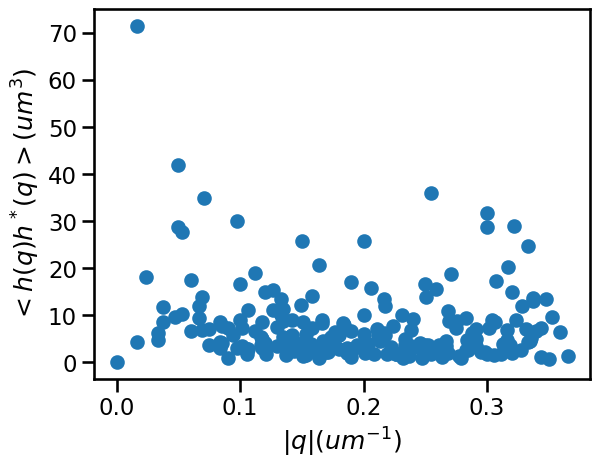

In [44]:
#plot in q space
arr_q = np.power(arr_q2_flatten, 0.5)
plt.scatter(np.power(arr_q2_flatten, 0.5), arr_sqr_fft2_average) # take sqrt of q^2 to get |q|
plt.ylabel('$<h(q)h^*(q)> (um^3)$')
plt.xlabel('$|q| (um^{-1})$')

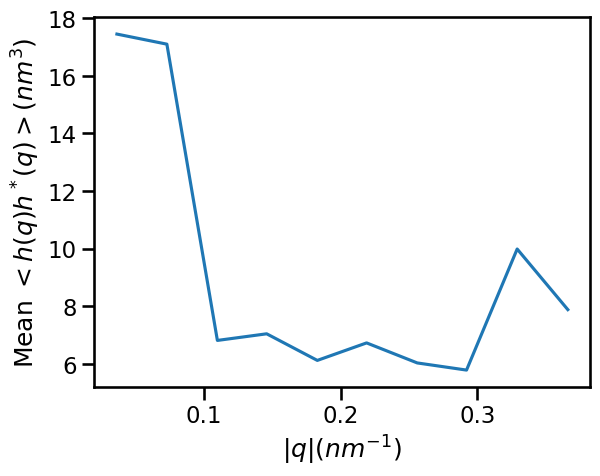

In [51]:
# Define the bin edges using arr_q
bin_edges = np.power(arr_q2_flatten, 0.5)

# Use pandas' cut function to assign each value in arr_sqr_fft2_average to a bin
bins = pd.cut(bin_edges, bins=10)
groups = pd.Series(arr_sqr_fft2_average).groupby(bins)

# Calculate the mean of arr_sqr_fft2_average for each bin
mean_values = groups.mean()

# Obtain the right bin edge values for the plot
bin_edges = [bin_edge.right for bin_edge in mean_values.index.categories]

# Plot the result
plt.plot(bin_edges, mean_values.values)
plt.ylabel('Mean $<h(q)h^*(q)> (nm^3)$')
plt.xlabel('$|q| (nm^{-1})$')
plt.show()